# HW7 Math 189

### By Leah Seseri, Imangali Amangeldi

## Question 1

In [27]:
# seed for reproducibility
set.seed(123)
boston <- read.csv("Boston.csv")

In [29]:
n <- nrow(boston)

# randomly sample half indicies
train_indices <- sample(1:n, n / 2)

# create training and test set of equal sizes 
train_set <- boston[train_indices, ]
test_set <- boston[-train_indices, ]

## Question 2

In [32]:
#install.packages("tree")
library(tree)

# fit training set with regression tree using all predictors
tree_model <- tree(medv ~ ., data = train_set)

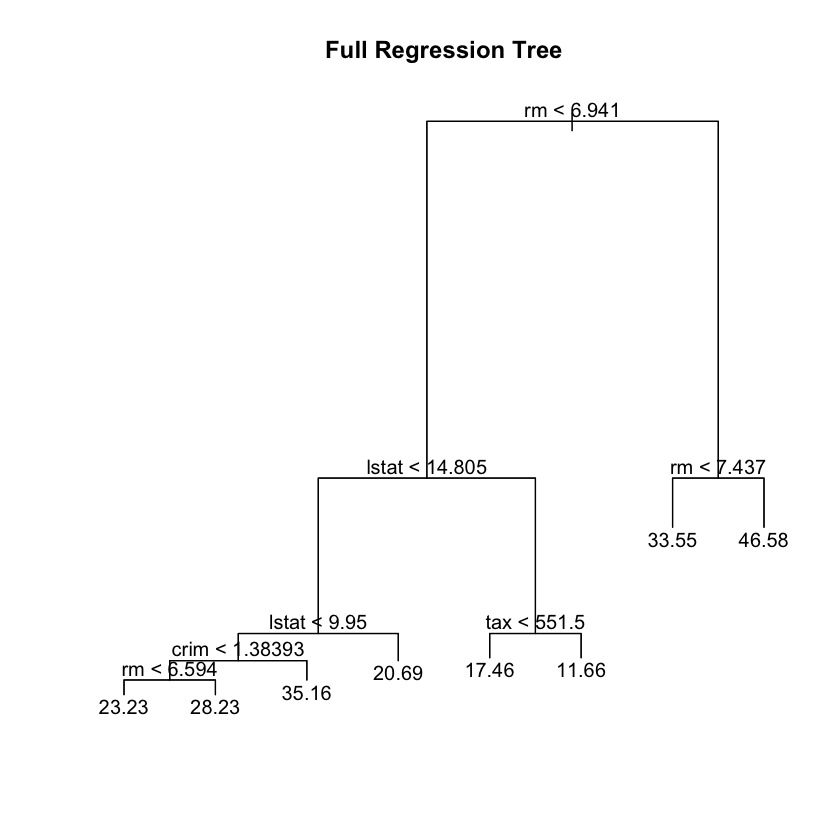

In [34]:
# plot large tree
plot(tree_model)
text(tree_model, pretty = 0)
title("Full Regression Tree")

In [36]:
# use cv to select subtree size
cv_result <- cv.tree(tree_model)

# choose the best subtree size
best_size <- cv_result$size[which.min(cv_result$dev)]

# prune the tree to obtain subtree
pruned_tree <- prune.tree(tree_model, best = best_size)

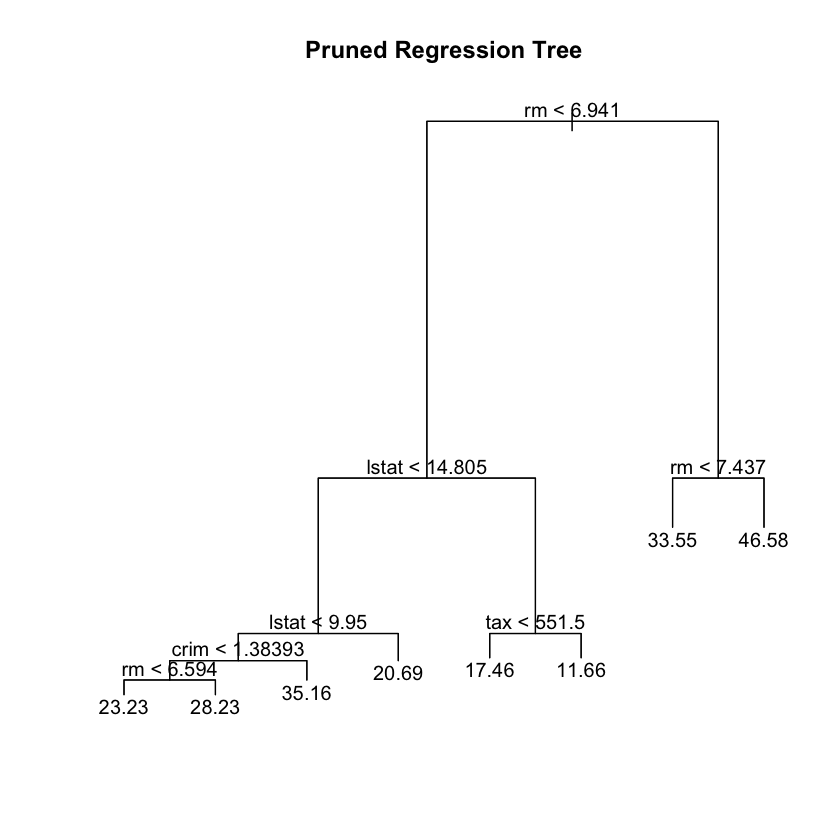

In [38]:
# plot pruned tree
plot(pruned_tree)
text(pruned_tree, pretty = 0)
title("Pruned Regression Tree")

In [40]:
# predict on the test set using both trees
pred_full <- predict(tree_model, newdata = test_set)
pred_pruned <- predict(pruned_tree, newdata = test_set)

# calculate prediction MSEs for both trees
mse_full <- mean((pred_full - test_set$medv)^2)
mse_pruned <- mean((pred_pruned - test_set$medv)^2)

cat("Test MSE (Full Tree):", round(mse_full, 3), "\n")
cat("Test MSE (Pruned Tree):", round(mse_pruned, 3), "\n")

Test MSE (Full Tree): 23.513 
Test MSE (Pruned Tree): 23.513 


## Question 3

In [43]:
# install.packages("randomForest")
library(randomForest)

# number of predictors for bagging
p <- ncol(train_set) - 1  # exclude medv

bag_model <- randomForest(medv ~ ., data = train_set, mtry = p, ntree = 100)

# predict on test set
bag_pred <- predict(bag_model, newdata = test_set)

# compute MSE
mse_bag <- mean((bag_pred - test_set$medv)^2)
cat("Test MSE (Bagging):", round(mse_bag, 3), "\n")

Test MSE (Bagging): 14.56 


In [45]:
# Random Forest where m = 4
rf_model <- randomForest(medv ~ ., data = train_set, mtry = 4, ntree = 100)

# predict on test set
rf_pred <- predict(rf_model, newdata = test_set)

# compute MSE
mse_rf <- mean((rf_pred - test_set$medv)^2)
cat("Test MSE (Random Forest):", round(mse_rf, 3), "\n")

Test MSE (Random Forest): 12.423 


In this case, fitting the training set with random forests resulted in the lowest test MSE of 12.423 compared, to bagging which gave an MSE of 14.56, and the single regression tree which gave an MSE of 23.513. This demonstrates that averaging over many trees reduces prediction error and variance compared to using a single tree.